# Lorenz attractor

In [7]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.collections import PolyCollection
from matplotlib.tri import Triangulation
from matplotlib.colors import LightSource
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.animation import FuncAnimation
import sys

sys.path.append("../../")
from experiments.datasets import LorenzSimulator
import plot_settings as ps
        

In [8]:
ps.setup()

In [9]:
sim1 = LorenzSimulator(random_trajectories=3, warmup=0.)
sim2 = LorenzSimulator(random_trajectories=10)

In [10]:
trajectories = [sim1.trajectory(0), sim1.trajectory(1), sim1.trajectory(2)]

In [11]:
# x = sim2.sample(1000)
x = np.load("../data/samples/lorenz/x_train.npy")[:1000]
# x = np.load("../data/samples/lorenz/x_test.npy")[:1000]

In [12]:
trajectories[0].shape

(1000000, 3)

## Plot

In [ ]:
dots = 500
length = 40000

fig, ax = ps.figure(height=0.33*ps.TEXTWIDTH, cbar=False, make3d=True, large_margin=0.01, small_margin=0.01)

ax.set_xlim3d(-2.8, 2.8)
ax.set_ylim3d(-2.8, 2.8)
ax.set_zlim3d(-2.8, 2.8)
ax.set_xticks([-2., 0., 2.])
ax.set_yticks([-2., 0., 2.])
ax.set_zticks([-2., 0., 2.])
ax.set_xticklabels(["-2\n", "0\n", "2\n"], va="center", ha="center", linespacing=2)  # arghgh
ax.set_yticklabels(["-2   \n", "0   \n", "2   \n"], ha="center", va="center", linespacing=2)
ax.set_zticklabels(["-2     ", "0     ", "2     "], ha="center")
ax.set_xlabel("$x_0$", labelpad=-5.)
ax.set_ylabel("$x_1$", labelpad=-5.)
ax.set_zlabel("$x_2$", labelpad=-5.)

ax.view_init(elev=20, azim=-70)
for i, color in enumerate([ps.COLORS[1], ps.COLORS[2], ps.COLORS[3]]):
    ax.plot(
        trajectories[i][:length, 0], trajectories[i][:length, 1], trajectories[i][:length, 2],
        lw=0.5, c=color
    )
ax.scatter(x[:dots,0], x[:dots,1], x[:dots,2], c=ps.COLOR_NEUTRAL1, s=1., zorder=5, alpha=1.)

plt.savefig("../figures/lorenz_data.pdf")


## Video

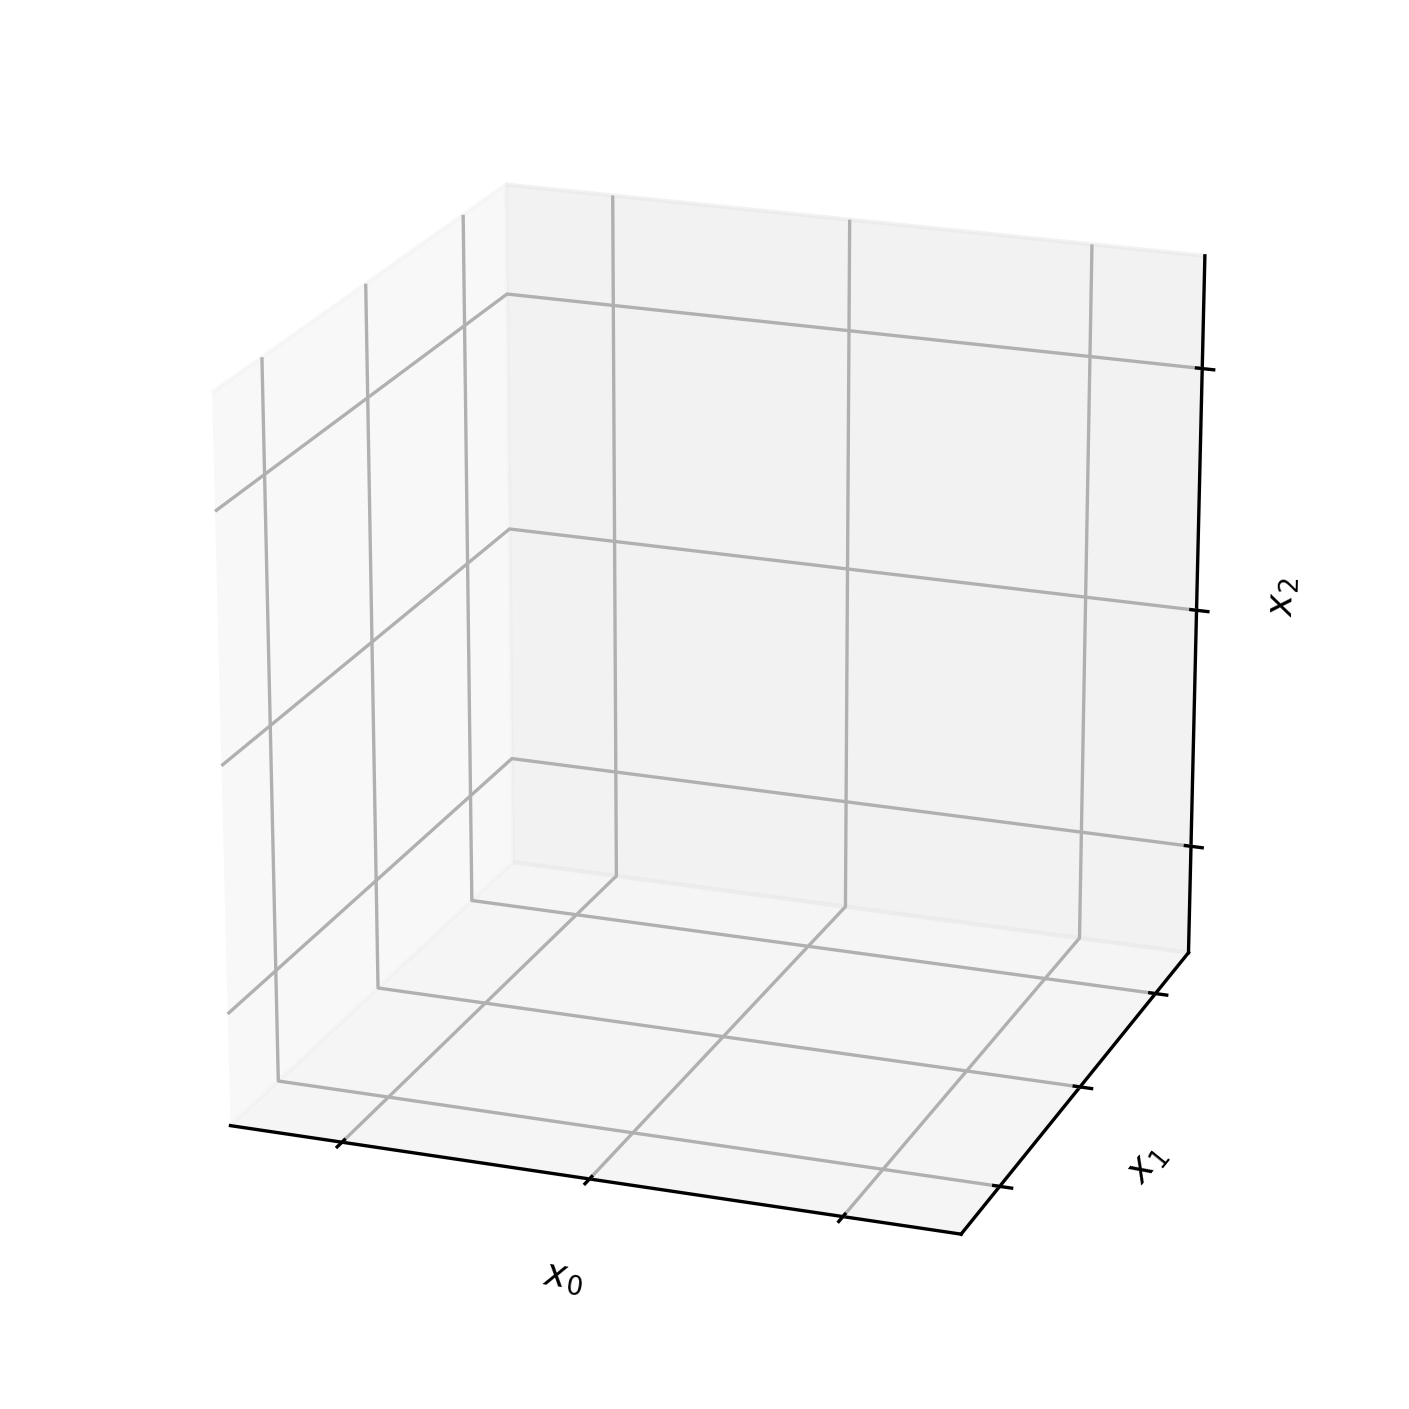

In [25]:
dots = 500
# length = 40000
n_frames = 600
frame_dots = 200
interval = 40
steps_per_frame = 50

fig, ax = ps.figure(height=0.5*ps.TEXTWIDTH, cbar=False, make3d=True, large_margin=0.05, small_margin=0.05)

ax.set_xlim3d(-2.8, 2.8)
ax.set_ylim3d(-2.8, 2.8)
ax.set_zlim3d(-2.8, 2.8)
ax.set_xticks([-2., 0., 2.])
ax.set_yticks([-2., 0., 2.])
ax.set_zticks([-2., 0., 2.])
ax.set_xticklabels(["", "", ""])
ax.set_yticklabels(["", "", ""])
ax.set_zticklabels(["", "", ""])
ax.set_xlabel("$x_0$", labelpad=-5.)
ax.set_ylabel("$x_1$", labelpad=-5.)
ax.set_zlabel("$x_2$", labelpad=-5.)

ax.view_init(elev=20, azim=-70)

lines, points = [], []
for i, color in enumerate([ps.COLORS[1], ps.COLORS[2], ps.COLORS[3]]):
    lines.append(
        ax.plot(
            trajectories[i][:1, 0], trajectories[i][:1, 1], trajectories[i][:1, 2],
            lw=0.5, c=color
        )[0]
    )
    
    points.append(
        ax.plot(
            trajectories[i][:1, 0], trajectories[i][:1, 1], trajectories[i][:1, 2],
            linestyle= " ", marker="o", markersize=7.,c=color
        )[0]
    )


def update(t):
    length = t * steps_per_frame
    
    for trajectory, line in zip(trajectories, lines):
        line.set_xdata(trajectory[:length, 0])
        line.set_ydata(trajectory[:length, 1])
        line.set_3d_properties(trajectory[:length, 2])
        
    for trajectory, point in zip(trajectories, points):
        point.set_xdata(trajectory[length - 1:length, 0])
        point.set_ydata(trajectory[length - 1:length, 1])
        point.set_3d_properties(trajectory[length - 1:length, 2])

anim = FuncAnimation(fig, update, frames=np.arange(0, n_frames), interval=interval)
anim.save('../figures/lorenz_system_stationary.gif', dpi=100, writer='imagemagick')



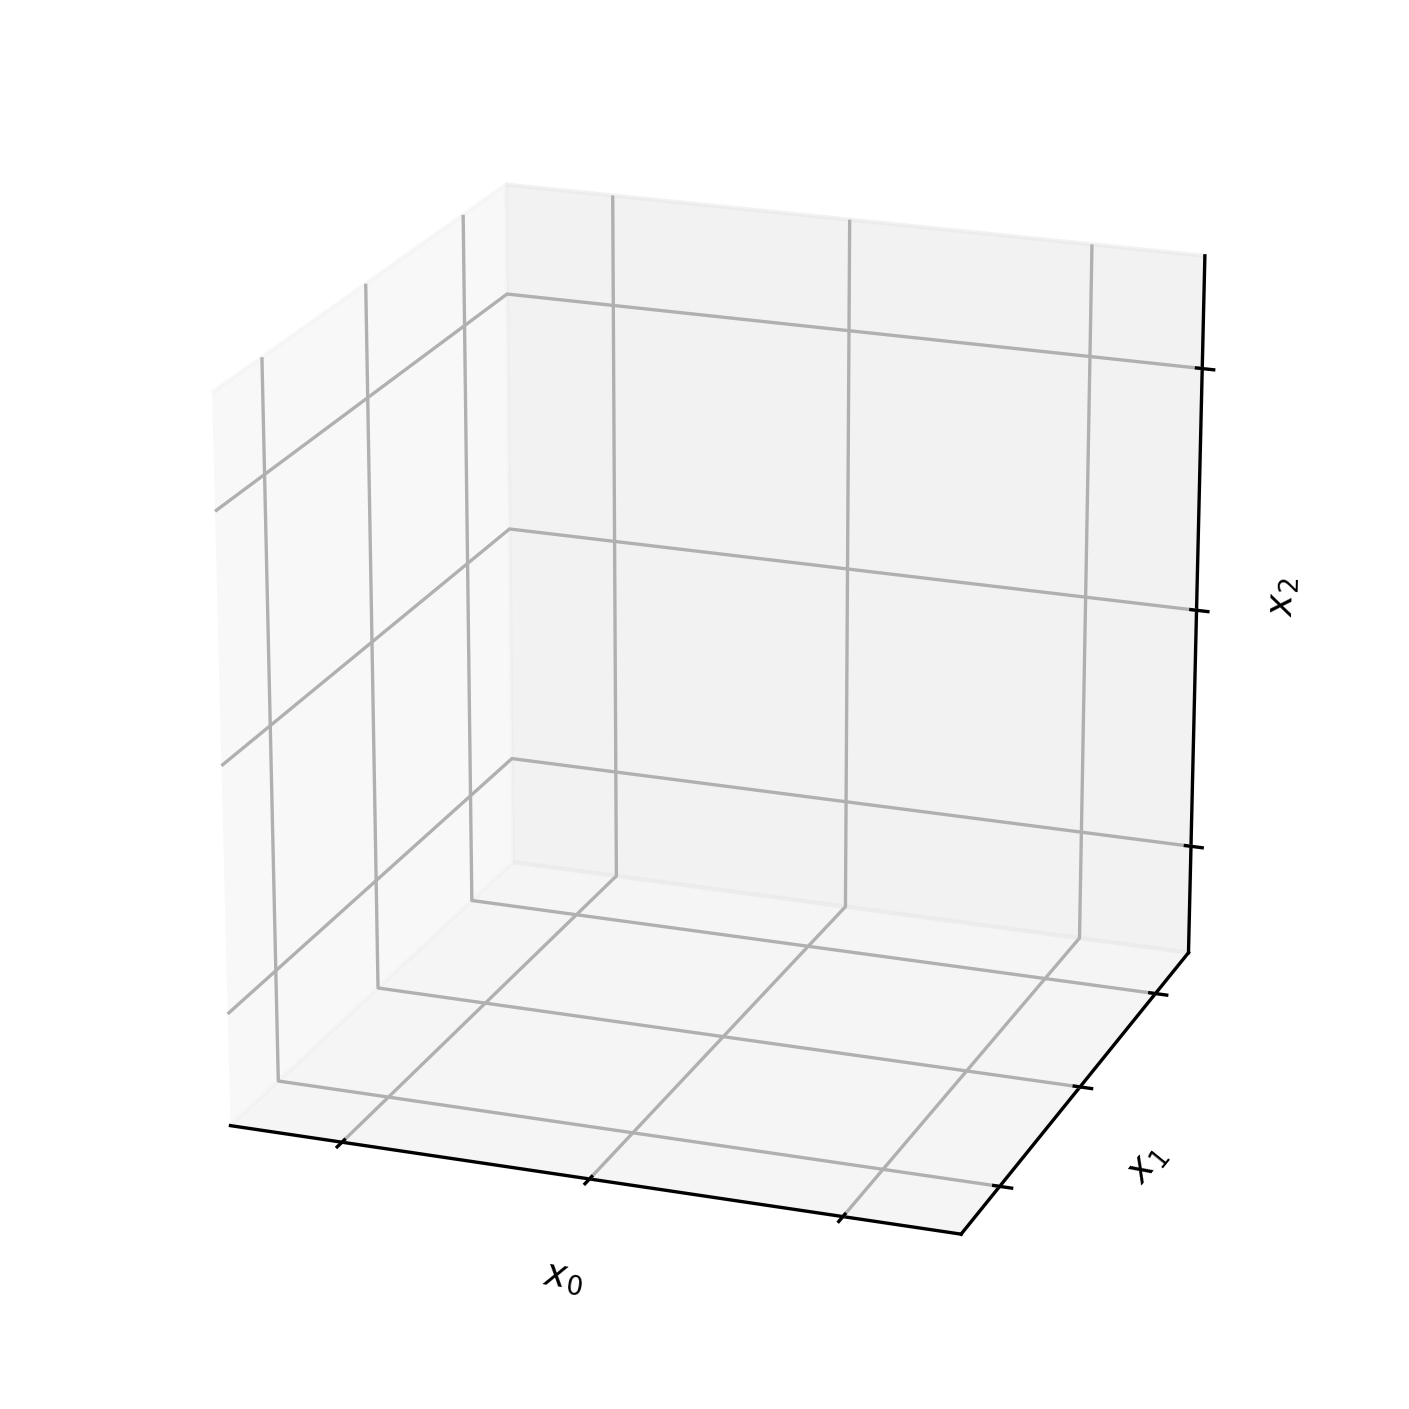

In [24]:
dots = 500
# length = 40000
n_frames = 600
frame_dots = 200
interval = 40
steps_per_frame = 50
rotations = 2

fig, ax = ps.figure(height=0.5*ps.TEXTWIDTH, cbar=False, make3d=True, large_margin=0.05, small_margin=0.05)

ax.set_xlim3d(-2.8, 2.8)
ax.set_ylim3d(-2.8, 2.8)
ax.set_zlim3d(-2.8, 2.8)
ax.set_xticks([-2., 0., 2.])
ax.set_yticks([-2., 0., 2.])
ax.set_zticks([-2., 0., 2.])
ax.set_xticklabels(["", "", ""])
ax.set_yticklabels(["", "", ""])
ax.set_zticklabels(["", "", ""])
ax.set_xlabel("$x_0$", labelpad=-5.)
ax.set_ylabel("$x_1$", labelpad=-5.)
ax.set_zlabel("$x_2$", labelpad=-5.)

ax.view_init(elev=20, azim=-70)

lines, points = [], []
for i, color in enumerate([ps.COLORS[1], ps.COLORS[2], ps.COLORS[3]]):
    lines.append(
        ax.plot(
            trajectories[i][:1, 0], trajectories[i][:1, 1], trajectories[i][:1, 2],
            lw=0.5, c=color
        )[0]
    )
    
    points.append(
        ax.plot(
            trajectories[i][:1, 0], trajectories[i][:1, 1], trajectories[i][:1, 2],
            linestyle= " ", marker="o", markersize=7.,c=color
        )[0]
    )


def update(t):
    length = t * steps_per_frame
    
    for trajectory, line in zip(trajectories, lines):
        line.set_xdata(trajectory[:length, 0])
        line.set_ydata(trajectory[:length, 1])
        line.set_3d_properties(trajectory[:length, 2])
        
    for trajectory, point in zip(trajectories, points):
        point.set_xdata(trajectory[length - 1:length, 0])
        point.set_ydata(trajectory[length - 1:length, 1])
        point.set_3d_properties(trajectory[length - 1:length, 2])
    
    ax.view_init(elev=20, azim=-70 + t * rotations * 360. / n_frames)

anim = FuncAnimation(fig, update, frames=np.arange(0, n_frames), interval=interval)
anim.save('../figures/lorenz_system_rotating.gif', dpi=100, writer='imagemagick')
